<a href="https://colab.research.google.com/github/smwalter96/PUS2020_MWalter/blob/master/HW11/NYC_business_census_data_MW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os


# Download 2000 business data.
!wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp00totals.zip

# Download 2010 business data.
!wget ftp://ftp.census.gov/econ2010/CBP_CSV/zbp10totals.zip

--2020-11-17 15:38:21--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp00totals.zip
           => ‘zbp00totals.zip’
Resolving ftp.census.gov (ftp.census.gov)... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov (ftp.census.gov)|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Econ2001_And_Earlier/CBP_CSV ... done.
==> SIZE zbp00totals.zip ... 628434
==> PASV ... done.    ==> RETR zbp00totals.zip ... done.
Length: 628434 (614K) (unauthoritative)

zbp00totals.zip     100%[===================>] 613.71K   112KB/s    in 6.2s    

2020-11-17 15:38:30 (99.6 KB/s) - ‘zbp00totals.zip’ saved [628434]

--2020-11-17 15:38:30--  ftp://ftp.census.gov/econ2010/CBP_CSV/zbp10totals.zip
           => ‘zbp10totals.zip’
Resolving ftp.census.gov (ftp.census.gov)... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov (ftp.census.gov)|148.129.75.35|:21.

In [2]:
!apt install libspatialindex-c4v5
!pip install pysal

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
0 upgraded, 2 newly installed, 0 to remove and 14 not upgraded.
Need to get 270 kB of archives.
After this operation, 1,107 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Fetched 270 kB in 2s (159 kB/s)
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_amd64.deb ...
Unpacking libspatialindex4v5:amd64 (1.8.5-5) ...
Selecting previously unselected package libspatialindex-c4v5:amd64.
Preparing to u

In [3]:
!pip install geopandas
!apt install python3-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-dev python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-dev python3-pkg-resources python3-rtree
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 400 kB of archives.
After this operation, 2,841 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-rtree all 0.8.3+ds-1 [16.9 kB]
Fetched 400 kB in 2s (212 kB/s)
Selecting previously unselected package python3-pkg-resources.
(Reading database ... 144804 files and directories currently installed.)
Preparing to unpack ..

In [4]:
import pylab as plt


In [5]:
import pysal as ps
import geopandas as gpd

In [6]:

# Unzip business data.

!unzip zbp00totals.zip 
!unzip zbp10totals.zip 



Archive:  zbp00totals.zip
  inflating: zbp00totals.txt         
Archive:  zbp10totals.zip
  inflating: zbp10totals.txt         


In [7]:

# Load data to pandas dataframes.
df00 = pd.read_csv('/content/zbp00totals.txt', 
                   usecols=['ZIP', 'NAME', 'EST'])
df10 = pd.read_csv('/content/zbp10totals.txt', 
                   usecols=['zip', 'name', 'est'])

# Rename columns in 2000 data.
df00.rename(columns={'NAME': 'name', 'ZIP': 'zip', 'EST': 'est'}, 
            inplace=True)

# Remove data outside of NY.
df00 = df00[df00.name.str[-2:] == 'NY']
df10 = df10[df10.name.str[-2:] == 'NY']

# Convert 'zip' to string.
df00['zip'] = df00['zip'].map(lambda x: "%05d"%x)
df10['zip'] = df10['zip'].map(lambda x: "%05d"%x)

# Set zip to index.
df00.set_index('zip', inplace=True)
df10.set_index('zip', inplace=True)

# Join business data on zip index.
biz = df00.join(df10, how='outer', lsuffix='2000', rsuffix='2010')

# Clean up dataframe columns.
biz.drop('name2010', axis=1, inplace=True)
biz.rename(columns={'name2000': 'name'}, inplace=True)
biz['est2000'] = biz.est2000.astype(float)

biz.sort_index().head(2), biz.sort_index().tail(2)

(                     name  est2000  est2010
 zip                                        
 00501      HOLTSVILLE, NY      1.0      2.0
 06390  FISHERS ISLAND, NY     38.0     40.0,
              name  est2000  est2010
 zip                                
 14904  ELMIRA, NY    216.0    199.0
 14905  ELMIRA, NY    121.0    105.0)

In [8]:
biz

,name,est2000,est2010
zip,,,
00501,"HOLTSVILLE, NY",1.0,2.0
06390,"FISHERS ISLAND, NY",38.0,40.0
10001,"NEW YORK, NY",7317.0,7241.0
10002,"NEW YORK, NY",2277.0,2872.0
10003,"NEW YORK, NY",3683.0,4113.0
...,...,...,...
14901,"ELMIRA, NY",541.0,486.0
14902,"ELMIRA, NY",46.0,25.0
14903,"ELMIRA, NY",265.0,254.0


In [9]:
c00 = biz['est2000'].sum()

c10 = biz['est2010'].sum()

print('The number of businesses in 2000 was:', c00)
print('The number of businesses in 2010 was:', c10)

The number of businesses in 2000 was: 491612.0
The number of businesses in 2010 was: 519013.0


In [10]:
!wget https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
!unzip application%2Fzip

--2020-11-17 15:39:48--  https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip [following]
--2020-11-17 15:39:49--  https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip
Reusing existing connection to data.cityofnewyork.us:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘application%2Fzip’

application%2Fzip       [   <=>              ]   1.44M  1.59MB/s    in 0.9s    

2020-11-17 15:39:51 (1.59 MB/s) - ‘application%2Fzip’ saved [1514401]

Archive:  application

In [11]:
zcode = gpd.GeoDataFrame.from_file("ZIP_CODE_040114.shp")
zcode

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


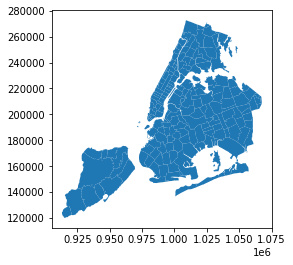

In [12]:
zcode.plot()

FIgure 1: Shows the zip code level geography in New York City.

In [13]:
censustract = gpd.GeoDataFrame.from_file(
    "https://data.cityofnewyork.us/api/geospatial/" + 
    "fxpq-c8ku?method=export&format=GeoJSON")
censustract

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ..."
1,MN19,1906016.35002,Turtle Bay-East Midtown,5534.19981063,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ..."
2,MN19,1860938.37721,Turtle Bay-East Midtown,5692.16873705,Manhattan,3808,010000,1,I,1010000,100,"MULTIPOLYGON (((-73.96802 40.75958, -73.96848 ..."
3,MN17,1860992.70485,Midtown-Midtown South,5687.80243866,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ..."
4,MN17,1864600.37503,Midtown-Midtown South,5693.03636655,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2160,QN61,2536195.96005,Jamaica,8201.8752654,Queens,4112,021200,4,I,4021200,212,"MULTIPOLYGON (((-73.81153 40.70227, -73.81083 ..."
2161,QN10,15530528.5775,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,35194.2249482,Queens,4114,107201,4,I,4107201,1072.01,"MULTIPOLYGON (((-73.81653 40.61495, -73.81655 ..."
2162,QN99,71788388.9114,park-cemetery-etc-Queens,182384.827557,Queens,4114,107202,4,I,4107202,1072.02,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
2163,SI11,86233396.7938,Charleston-Richmond Valley-Tottenville,54954.3509498,Staten Island,3901,022600,5,I,5022600,226,"MULTIPOLYGON (((-74.20700 40.55757, -74.20880 ..."


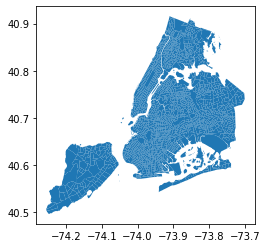

In [14]:
censustract.plot()

Figure 2: Shows the census tract geography in New York City.

In [15]:
# Convert census tract data to centroid geometry.
censustract['geometry'] = censustract.geometry.centroid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [16]:
# Reset index of zipcodes for spatial join.
zipcode = zcode
censustract.reset_index(inplace=True)
zipcode.reset_index(inplace=True)


In [17]:
# Spatial join of 2000 & 2010 census tract centroids to zipcodes.
zipcode = gpd.sjoin(left_df=censustract[["shape_leng",	"boro_name",	"ct2010", "geometry"]],
             right_df=zipcode[["ZIPCODE",	"POPULATION", "geometry"]].to_crs(censustract.crs),
             how='right', op='intersects', 
             lsuffix='00', rsuffix='zc')

In [18]:
# Join mean of spatial join results to zipcodes.
z1=zipcode.groupby("ZIPCODE").mean()
z1

,index_00,POPULATION
ZIPCODE,,
00083,1819.000000,25.0
10001,1703.166667,22413.0
10002,1383.928571,81305.0
10003,1693.700000,55878.0
10004,1607.333333,2187.0
...,...,...
11691,1604.000000,60267.0
11692,1359.500000,18018.0
11693,1712.333333,11052.0


In [19]:
biz1 = biz.groupby("zip").sum()
biz1

,est2000,est2010
zip,,
00501,1.0,2.0
06390,38.0,40.0
10001,7317.0,7241.0
10002,2277.0,2872.0
10003,3683.0,4113.0
...,...,...
14901,541.0,486.0
14902,46.0,25.0
14903,265.0,254.0


In [20]:
bdata = z1.merge(biz1, left_index=True, right_index=True)


bdata

,index_00,POPULATION,est2000,est2010
10001,1703.166667,22413.0,7317.0,7241.0
10002,1383.928571,81305.0,2277.0,2872.0
10003,1693.700000,55878.0,3683.0,4113.0
10004,1607.333333,2187.0,1294.0,1398.0
10005,1497.000000,8107.0,1287.0,1266.0
...,...,...,...,...
11691,1604.000000,60267.0,376.0,490.0
11692,1359.500000,18018.0,79.0,90.0
11693,1712.333333,11052.0,79.0,132.0
11694,1643.142857,20163.0,288.0,330.0


In [21]:
bizip = zcode.merge(bdata, left_on='ZIPCODE', right_index=True)
bizip

,index,ZIPCODE,BLDGZIP,PO_NAME,POPULATION_x,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,index_00,POPULATION_y,est2000,est2010
0,0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",1253.900000,18681.0,65.0,98.0
1,1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",762.411765,62426.0,477.0,675.0
2,2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",1040.631579,83866.0,520.0,699.0
3,3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",720.714286,56527.0,417.0,580.0
4,4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",992.470588,72280.0,1161.0,1474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,257,11414,0,Howard Beach,26148.0,6.392882e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1025670.681 184011.380, 1025872.813 ...",1747.000000,26148.0,445.0,438.0
258,258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",1532.714286,25003.0,424.0,485.0
260,260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20...",1532.000000,28481.0,0.0,30.0
261,261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21...",996.000000,0.0,21.0,21.0


In [22]:
bizip = bizip.fillna(0)
bizip

,index,ZIPCODE,BLDGZIP,PO_NAME,POPULATION_x,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,index_00,POPULATION_y,est2000,est2010
0,0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",1253.900000,18681.0,65.0,98.0
1,1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",762.411765,62426.0,477.0,675.0
2,2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",1040.631579,83866.0,520.0,699.0
3,3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",720.714286,56527.0,417.0,580.0
4,4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",992.470588,72280.0,1161.0,1474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,257,11414,0,Howard Beach,26148.0,6.392882e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1025670.681 184011.380, 1025872.813 ...",1747.000000,26148.0,445.0,438.0
258,258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",1532.714286,25003.0,424.0,485.0
260,260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20...",1532.000000,28481.0,0.0,30.0
261,261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21...",996.000000,0.0,21.0,21.0


In [23]:
bizip = bizip.fillna(0)
bizip

,index,ZIPCODE,BLDGZIP,PO_NAME,POPULATION_x,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,index_00,POPULATION_y,est2000,est2010
0,0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",1253.900000,18681.0,65.0,98.0
1,1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",762.411765,62426.0,477.0,675.0
2,2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",1040.631579,83866.0,520.0,699.0
3,3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",720.714286,56527.0,417.0,580.0
4,4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",992.470588,72280.0,1161.0,1474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,257,11414,0,Howard Beach,26148.0,6.392882e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1025670.681 184011.380, 1025872.813 ...",1747.000000,26148.0,445.0,438.0
258,258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",1532.714286,25003.0,424.0,485.0
260,260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20...",1532.000000,28481.0,0.0,30.0
261,261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21...",996.000000,0.0,21.0,21.0


In [24]:
bizip= bizip.to_crs({'init': 'epsg:3857'})
bizip["area"] = bizip['geometry'].area/ 10**6

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [25]:
bizip["bdens00"] = (bizip['est2000']/bizip['area'])
bizip["bdens10"] = (bizip['est2010']/bizip['area'])
bizip["dif"] = (bizip['bdens10']-bizip['bdens00'])
bizip = bizip[bizip['area'] > .3]
bizip

,index,ZIPCODE,BLDGZIP,PO_NAME,POPULATION_x,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,index_00,POPULATION_y,est2000,est2010,area,bdens00,bdens10,dif
0,0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((-8216029.470 4965682.769, -8216011.9...",1253.900000,18681.0,65.0,98.0,3.670127,17.710558,26.702072,8.991514
1,1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-8230673.455 4965216.008, -8230392.3...",762.411765,62426.0,477.0,675.0,4.790203,99.578248,140.912615,41.334367
2,2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-8226837.796 4963911.170, -8226758.2...",1040.631579,83866.0,520.0,699.0,6.783596,76.655504,103.042687,26.387183
3,3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-8232963.912 4963884.338, -8232717.3...",720.714286,56527.0,417.0,580.0,3.830245,108.870329,151.426358,42.556028
4,4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-8234534.400 4960940.544, -8234516.0...",992.470588,72280.0,1161.0,1474.0,5.955326,194.951555,247.509553,52.557999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,11361,0,Bayside,28496.0,5.016352e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((-8211640.000 4979350.699, -8211637.5...",1009.916667,28496.0,859.0,1010.0,8.132117,105.630548,124.198898,18.568350
256,256,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-8235565.216 4976806.772, -8235345.0...",971.800000,23543.0,6236.0,5974.0,1.847017,3376.254474,3234.404141,-141.850332
257,257,11414,0,Howard Beach,26148.0,6.392882e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((-8221020.285 4964029.873, -8220939.2...",1747.000000,26148.0,445.0,438.0,10.330871,43.074780,42.397199,-0.677581
258,258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((-8251072.609 4959539.011, -8251064.5...",1532.714286,25003.0,424.0,485.0,8.633221,49.112606,56.178334,7.065729


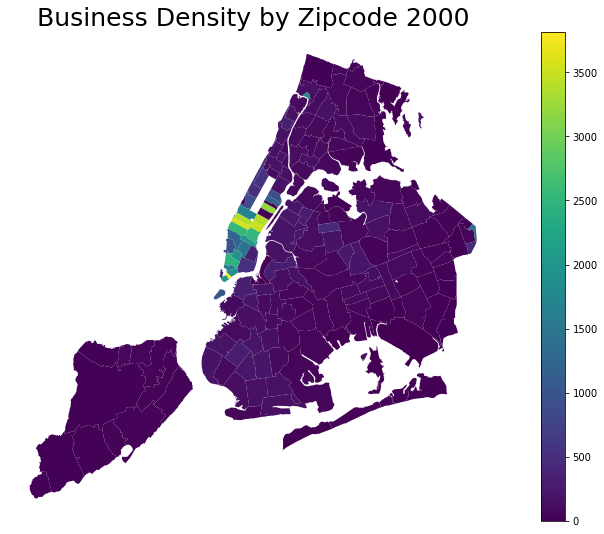

In [26]:

ax = bizip.plot(column='bdens00', cmap =    
                                'viridis', figsize=(15,9),   
                                  legend = True);
ax.set_title('Business Density by Zipcode 2000', fontdict= 
            {'fontsize':25})
ax.set_axis_off()
ax.get_legend()

Figure 3: Business density in New York City for 2000 after many small Zipcodes were dropped. Higher business density is typically seen on the west side of the city in Manhattan.

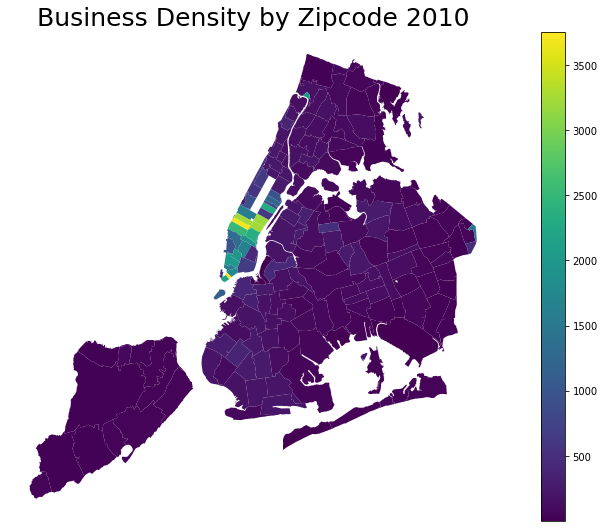

In [27]:
ax = bizip.plot(column='bdens10', cmap =    
                                'viridis', figsize=(15,9),   
                                  legend = True);
ax.set_title('Business Density by Zipcode 2010', fontdict= 
            {'fontsize':25})

ax.set_axis_off()

ax.get_legend()

Figure 4: Business density for 2010. There is not much noticable change between the two years, most highly dense Zipcodes are still in Manhattan.

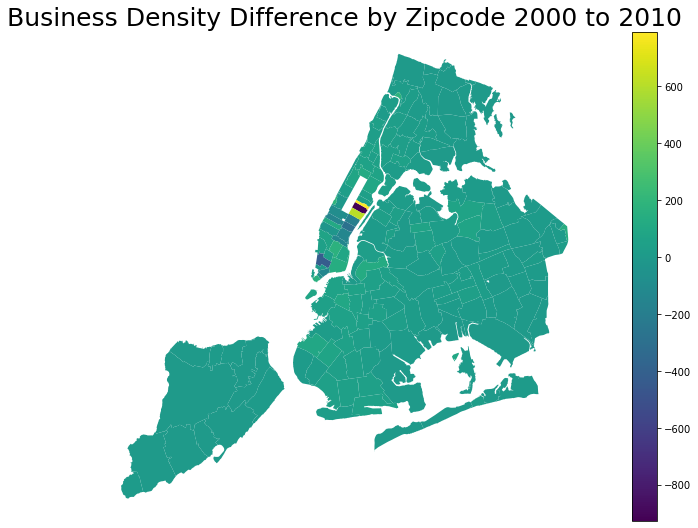

In [28]:
ax = bizip.plot(column='dif', cmap =    
                                'viridis', figsize=(15,9),   
                                  legend = True);
ax.set_title('Business Density Difference by Zipcode 2000 to 2010', fontdict= 
            {'fontsize':25})

ax.set_axis_off()

ax.get_legend()

Figure 5: Shows the difference in business density by Zipcodes between 2000 and 2010. While most Zipcodes stay the same, some change is seen in Manhattan Zipcodes, of either high loss of density or high gain in density.

In [29]:
c00 = pd.read_csv('https://raw.githubusercontent.com/fedhere/PUS2020_FBianco/master/data/dec_00_sf1_dp1.csv')
c00 = c00[['geo_id2', 'geo_display_label', 'hc01_vc01',  'hc01_vc18', 'hc02_vc48']]
c00 = c00.rename(columns={'geo_id2': 'id', 'geo_display_label': 'label', 'hc01_vc01': 'Population00', 'hc01_vc18': 'MedianAge00', 'hc02_vc48': 'PercWhite00'})
c00


,id,label,Population00,MedianAge00,PercWhite00
0,36047054300,"Census Tract 543, Kings County, New York",0,0.0,NaN
1,36081121100,"Census Tract 1211, Queens County, New York",0,0.0,NaN
2,36005003700,"Census Tract 37, Bronx County, New York",478,22.0,20.7
3,36005004900,"Census Tract 49, Bronx County, New York",246,30.0,25.6
4,36005005800,"Census Tract 58, Bronx County, New York",5,23.5,0.0
...,...,...,...,...,...
4902,36123990100,"Census Tract 9901, Yates County, New York",5805,37.7,97.9
4903,36123990200,"Census Tract 9902, Yates County, New York",5471,38.4,98.6
4904,36123990300,"Census Tract 9903, Yates County, New York",5225,38.1,98.9
4905,36123990400,"Census Tract 9904, Yates County, New York",3975,38.0,98.5


In [30]:
c10 = pd.read_csv('https://raw.githubusercontent.com/fedhere/PUS2020_FBianco/master/data/dec_10_sf1_sf1dp1.csv')
c10 = c10[['geo_id2', 'geo_display_label', 'hd01_s001',  'hd01_s020', 'hd02_s100']]
c10 = c10.rename(columns={'geo_id2': 'id', 'hd01_s001': 'Population10', 'hd01_s020': 'MedianAge10', 'hd02_s100': 'PercWhite10'})
c10

,id,geo_display_label,Population10,MedianAge10,PercWhite10
0,36081038301,"Census Tract 383.01, Queens County, New York",0,0.0,NaN
1,36005002400,"Census Tract 24, Bronx County, New York",4,38.0,50.0
2,36059990200,"Census Tract 9902, Nassau County, New York",0,0.0,NaN
3,36059990400,"Census Tract 9904, Nassau County, New York",0,0.0,NaN
4,36007012900,"Census Tract 129, Broome County, New York",1532,59.8,98.8
...,...,...,...,...,...
4914,36123150100,"Census Tract 1501, Yates County, New York",5942,39.7,98.2
4915,36123150200,"Census Tract 1502, Yates County, New York",5561,40.0,98.0
4916,36123150300,"Census Tract 1503, Yates County, New York",5348,43.4,99.0
4917,36123150400,"Census Tract 1504, Yates County, New York",3973,38.7,97.2


In [31]:
ce = c00.merge(c10, on = 'id')
ce

,id,label,Population00,MedianAge00,PercWhite00,geo_display_label,Population10,MedianAge10,PercWhite10
0,36047054300,"Census Tract 543, Kings County, New York",0,0.0,NaN,"Census Tract 543, Kings County, New York",327,33.8,78.0
1,36081121100,"Census Tract 1211, Queens County, New York",0,0.0,NaN,"Census Tract 1211, Queens County, New York",0,0.0,NaN
2,36005003700,"Census Tract 37, Bronx County, New York",478,22.0,20.7,"Census Tract 37, Bronx County, New York",245,35.1,25.7
3,36005017100,"Census Tract 171, Bronx County, New York",3,47.5,0.0,"Census Tract 171, Bronx County, New York",0,0.0,NaN
4,36009940200,"Census Tract 9402, Cattaraugus County, New York",2,31.0,100.0,"Census Tract 9402, Cattaraugus County, New York",0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
4192,36119014808,"Census Tract 148.08, Westchester County, New York",3596,39.1,91.4,"Census Tract 148.08, Westchester County, New York",3464,44.4,89.7
4193,36119014809,"Census Tract 148.09, Westchester County, New York",6021,39.1,92.3,"Census Tract 148.09, Westchester County, New York",6115,43.2,90.1
4194,36119014907,"Census Tract 149.07, Westchester County, New York",3556,36.3,96.6,"Census Tract 149.07, Westchester County, New York",4411,39.2,90.0
4195,36119014908,"Census Tract 149.08, Westchester County, New York",2702,38.0,96.9,"Census Tract 149.08, Westchester County, New York",2886,42.8,95.0


In [32]:
inc00 = pd.read_csv('https://raw.githubusercontent.com/smwalter96/PUS2020_MWalter/master/HW11/income2000.csv', skiprows=[1])
inc00 = inc00[['GEO_ID', 'NAME', 'DP3_C112']]
inc00 = inc00.rename(columns={'DP3_C112': 'inc00'})
inc00

,GEO_ID,NAME,inc00
0,1400000US36047120000,"Census Tract 1200, Kings County, New York",30556
1,1400000US36047120200,"Census Tract 1202, Kings County, New York",35741
2,1400000US36047120800,"Census Tract 1208, Kings County, New York",30568
3,1400000US36047121000,"Census Tract 1210, Kings County, New York",9919
4,1400000US36047121400,"Census Tract 1214, Kings County, New York",8927
...,...,...,...
4902,1400000US36103111602,"Census Tract 1116.02, Suffolk County, New York",66983
4903,1400000US36103111701,"Census Tract 1117.01, Suffolk County, New York",63942
4904,1400000US36103111703,"Census Tract 1117.03, Suffolk County, New York",75756
4905,1400000US36103111704,"Census Tract 1117.04, Suffolk County, New York",86200


In [33]:
inc10 = pd.read_csv('https://raw.githubusercontent.com/smwalter96/PUS2020_MWalter/master/HW11/income2010.csv', skiprows=[1])
inc10 = inc10[['NAME', 'S1901_C01_012E']]
inc10 = inc10.rename(columns={'S1901_C01_012E': 'inc10'})
inc10

,NAME,inc10
0,"Census Tract 1, Albany County, New York",32333
1,"Census Tract 2, Albany County, New York",25354
2,"Census Tract 3, Albany County, New York",30932
3,"Census Tract 4.01, Albany County, New York",60909
4,"Census Tract 4.03, Albany County, New York",52807
...,...,...
4914,"Census Tract 1501, Yates County, New York",46691
4915,"Census Tract 1502, Yates County, New York",37417
4916,"Census Tract 1503, Yates County, New York",45769
4917,"Census Tract 1504, Yates County, New York",61736


In [34]:
censustract = gpd.GeoDataFrame.from_file(
    "https://data.cityofnewyork.us/api/geospatial/" + 
    "fxpq-c8ku?method=export&format=GeoJSON")
censustract

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ..."
1,MN19,1906016.35002,Turtle Bay-East Midtown,5534.19981063,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ..."
2,MN19,1860938.37721,Turtle Bay-East Midtown,5692.16873705,Manhattan,3808,010000,1,I,1010000,100,"MULTIPOLYGON (((-73.96802 40.75958, -73.96848 ..."
3,MN17,1860992.70485,Midtown-Midtown South,5687.80243866,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ..."
4,MN17,1864600.37503,Midtown-Midtown South,5693.03636655,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2160,QN61,2536195.96005,Jamaica,8201.8752654,Queens,4112,021200,4,I,4021200,212,"MULTIPOLYGON (((-73.81153 40.70227, -73.81083 ..."
2161,QN10,15530528.5775,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,35194.2249482,Queens,4114,107201,4,I,4107201,1072.01,"MULTIPOLYGON (((-73.81653 40.61495, -73.81655 ..."
2162,QN99,71788388.9114,park-cemetery-etc-Queens,182384.827557,Queens,4114,107202,4,I,4107202,1072.02,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
2163,SI11,86233396.7938,Charleston-Richmond Valley-Tottenville,54954.3509498,Staten Island,3901,022600,5,I,5022600,226,"MULTIPOLYGON (((-74.20700 40.55757, -74.20880 ..."


In [36]:
!wget https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip

!unzip application%2Fzip

--2020-11-17 15:40:14--  https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip [following]
--2020-11-17 15:40:15--  https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip
Reusing existing connection to data.cityofnewyork.us:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘application%2Fzip.1’

application%2Fzip.1     [   <=>              ]   1.44M  1.59MB/s    in 0.9s    

2020-11-17 15:40:17 (1.59 MB/s) - ‘application%2Fzip.1’ saved [1514401]

Archive:  applica

In [37]:
zip = gpd.GeoDataFrame.from_file("ZIP_CODE_040114.shp")
zip

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


In [38]:
# Convert census tract data to centroid geometry.
censustract['geometry'] = censustract.geometry.centroid

censustract.reset_index(inplace=True)
zip.reset_index(inplace=True)

zip = gpd.sjoin(left_df=censustract[["shape_leng",'puma', 'boro_ct2010',	"boro_name",	"ct2010", "geometry"]],
             right_df=zip[["ZIPCODE",	"POPULATION", "geometry", 'COUNTY', 'CTY_FIPS']].to_crs(censustract.crs),
             how='right', op='intersects', 
             lsuffix='00', rsuffix='zc')

zip

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,index_00,shape_leng,puma,boro_ct2010,boro_name,ct2010,ZIPCODE,POPULATION,geometry,COUNTY,CTY_FIPS
0,409.0,6323.59663386,4112,4019000,Queens,019000,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081
0,573.0,6955.46452797,4112,4018800,Queens,018800,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081
0,575.0,8038.55967977,4112,4019200,Queens,019200,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081
0,1168.0,7150.59389471,4112,4018402,Queens,018402,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081
0,1180.0,7087.16640819,4112,4018200,Queens,018200,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081
...,...,...,...,...,...,...,...,...,...,...,...
260,1862.0,7343.45091916,4001,3055500,Brooklyn,055500,11249,28481.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",Kings,047
260,1867.0,6845.7755595,4001,3054900,Brooklyn,054900,11249,28481.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",Kings,047
260,1881.0,7122.6772057,4001,3055100,Brooklyn,055100,11249,28481.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",Kings,047
261,996.0,5904.30055105,3805,1013200,Manhattan,013200,10162,0.0,"POLYGON ((-73.95133 40.76931, -73.95165 40.769...",New York,061


In [39]:
inc = inc00.merge(inc10, on = 'NAME')
inc

,GEO_ID,NAME,inc00,inc10
0,1400000US36047120000,"Census Tract 1200, Kings County, New York",30556,29537
1,1400000US36047120200,"Census Tract 1202, Kings County, New York",35741,62974
2,1400000US36047120800,"Census Tract 1208, Kings County, New York",30568,32417
3,1400000US36047121000,"Census Tract 1210, Kings County, New York",9919,17377
4,1400000US36047121400,"Census Tract 1214, Kings County, New York",8927,17022
...,...,...,...,...
4192,1400000US36103111602,"Census Tract 1116.02, Suffolk County, New York",66983,104500
4193,1400000US36103111701,"Census Tract 1117.01, Suffolk County, New York",63942,94125
4194,1400000US36103111703,"Census Tract 1117.03, Suffolk County, New York",75756,102833
4195,1400000US36103111704,"Census Tract 1117.04, Suffolk County, New York",86200,123672


In [40]:
cdata = inc.merge(ce, right_on = 'label', left_on = 'NAME')

In [41]:
cdata['sid'] = cdata['id'].astype(str)

cdata

,GEO_ID,NAME,inc00,inc10,id,label,Population00,MedianAge00,PercWhite00,geo_display_label,Population10,MedianAge10,PercWhite10,sid
0,1400000US36047120000,"Census Tract 1200, Kings County, New York",30556,29537,36047120000,"Census Tract 1200, Kings County, New York",2247,34.7,16.0,"Census Tract 1200, Kings County, New York",2148,34.1,12.6,36047120000
1,1400000US36047120200,"Census Tract 1202, Kings County, New York",35741,62974,36047120200,"Census Tract 1202, Kings County, New York",1916,30.2,15.1,"Census Tract 1202, Kings County, New York",1900,29.3,10.3,36047120200
2,1400000US36047120800,"Census Tract 1208, Kings County, New York",30568,32417,36047120800,"Census Tract 1208, Kings County, New York",8483,32.5,8.1,"Census Tract 1208, Kings County, New York",8938,33.3,9.4,36047120800
3,1400000US36047121000,"Census Tract 1210, Kings County, New York",9919,17377,36047121000,"Census Tract 1210, Kings County, New York",3986,24.9,15.4,"Census Tract 1210, Kings County, New York",4035,28.6,18.6,36047121000
4,1400000US36047121400,"Census Tract 1214, Kings County, New York",8927,17022,36047121400,"Census Tract 1214, Kings County, New York",4384,24.1,12.5,"Census Tract 1214, Kings County, New York",4351,26.8,13.1,36047121400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192,1400000US36103111602,"Census Tract 1116.02, Suffolk County, New York",66983,104500,36103111602,"Census Tract 1116.02, Suffolk County, New York",3201,38.1,97.4,"Census Tract 1116.02, Suffolk County, New York",3252,42.1,96.2,36103111602
4193,1400000US36103111701,"Census Tract 1117.01, Suffolk County, New York",63942,94125,36103111701,"Census Tract 1117.01, Suffolk County, New York",5312,36.4,94.9,"Census Tract 1117.01, Suffolk County, New York",5669,40.8,90.8,36103111701
4194,1400000US36103111703,"Census Tract 1117.03, Suffolk County, New York",75756,102833,36103111703,"Census Tract 1117.03, Suffolk County, New York",3312,38.6,95.4,"Census Tract 1117.03, Suffolk County, New York",3246,42.8,94.2,36103111703
4195,1400000US36103111704,"Census Tract 1117.04, Suffolk County, New York",86200,123672,36103111704,"Census Tract 1117.04, Suffolk County, New York",3295,39.6,96.6,"Census Tract 1117.04, Suffolk County, New York",3251,43.0,96.4,36103111704


In [42]:
zip['tract'] = zip['boro_ct2010'].str[1:]
cdata['num'] = cdata['sid'].str[4:]
zip['id'] = '36' + zip['CTY_FIPS'].astype(str) + zip['tract'].astype(str)
zip

,index_00,shape_leng,puma,boro_ct2010,boro_name,ct2010,ZIPCODE,POPULATION,geometry,COUNTY,CTY_FIPS,tract,id
0,409.0,6323.59663386,4112,4019000,Queens,019000,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081,019000,36081019000
0,573.0,6955.46452797,4112,4018800,Queens,018800,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081,018800,36081018800
0,575.0,8038.55967977,4112,4019200,Queens,019200,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081,019200,36081019200
0,1168.0,7150.59389471,4112,4018402,Queens,018402,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081,018402,36081018402
0,1180.0,7087.16640819,4112,4018200,Queens,018200,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081,018200,36081018200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,1862.0,7343.45091916,4001,3055500,Brooklyn,055500,11249,28481.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",Kings,047,055500,36047055500
260,1867.0,6845.7755595,4001,3054900,Brooklyn,054900,11249,28481.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",Kings,047,054900,36047054900
260,1881.0,7122.6772057,4001,3055100,Brooklyn,055100,11249,28481.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",Kings,047,055100,36047055100
261,996.0,5904.30055105,3805,1013200,Manhattan,013200,10162,0.0,"POLYGON ((-73.95133 40.76931, -73.95165 40.769...",New York,061,013200,36061013200


In [43]:
gcensus = zip.merge(cdata, left_on = 'id', right_on = 'sid')
gcensus

,index_00,shape_leng,puma,boro_ct2010,boro_name,ct2010,ZIPCODE,POPULATION,geometry,COUNTY,CTY_FIPS,tract,id_x,GEO_ID,NAME,inc00,inc10,id_y,label,Population00,MedianAge00,PercWhite00,geo_display_label,Population10,MedianAge10,PercWhite10,sid,num
0,409.0,6323.59663386,4112,4019000,Queens,019000,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081,019000,36081019000,1400000US36081019000,"Census Tract 190, Queens County, New York",38241,60305,36081019000,"Census Tract 190, Queens County, New York",2226,32.0,1.8,"Census Tract 190, Queens County, New York",1969,35.3,4.2,36081019000,1019000
1,573.0,6955.46452797,4112,4018800,Queens,018800,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081,018800,36081018800,1400000US36081018800,"Census Tract 188, Queens County, New York",44306,86739,36081018800,"Census Tract 188, Queens County, New York",1266,35.9,3.2,"Census Tract 188, Queens County, New York",1236,35.9,3.9,36081018800,1018800
2,575.0,8038.55967977,4112,4019200,Queens,019200,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081,019200,36081019200,1400000US36081019200,"Census Tract 192, Queens County, New York",39519,62692,36081019200,"Census Tract 192, Queens County, New York",2000,35.9,2.0,"Census Tract 192, Queens County, New York",1914,36.9,4.2,36081019200,1019200
3,1168.0,7150.59389471,4112,4018402,Queens,018402,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081,018402,36081018402,1400000US36081018402,"Census Tract 184.02, Queens County, New York",50625,73587,36081018402,"Census Tract 184.02, Queens County, New York",2186,33.5,1.8,"Census Tract 184.02, Queens County, New York",2223,37.7,4.3,36081018402,1018402
4,1180.0,7087.16640819,4112,4018200,Queens,018200,11436,18681.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",Queens,081,018200,36081018200,1400000US36081018200,"Census Tract 182, Queens County, New York",33194,46963,36081018200,"Census Tract 182, Queens County, New York",2238,31.7,2.9,"Census Tract 182, Queens County, New York",2267,33.3,7.7,36081018200,1018200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,1522.0,5308.78442674,4001,3054500,Brooklyn,054500,11249,28481.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",Kings,047,054500,36047054500,1400000US36047054500,"Census Tract 545, Kings County, New York",13454,21707,36047054500,"Census Tract 545, Kings County, New York",7741,19.0,74.0,"Census Tract 545, Kings County, New York",8008,22.7,79.0,36047054500,7054500
1920,1609.0,5664.39969841,4001,3054700,Brooklyn,054700,11249,28481.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",Kings,047,054700,36047054700,1400000US36047054700,"Census Tract 547, Kings County, New York",15379,22865,36047054700,"Census Tract 547, Kings County, New York",3364,18.5,76.7,"Census Tract 547, Kings County, New York",5245,23.5,81.8,36047054700,7054700
1921,1862.0,7343.45091916,4001,3055500,Brooklyn,055500,11249,28481.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",Kings,047,055500,36047055500,1400000US36047055500,"Census Tract 555, Kings County, New York",50132,59767,36047055500,"Census Tract 555, Kings County, New York",868,32.7,84.6,"Census Tract 555, Kings County, New York",1959,31.3,74.6,36047055500,7055500
1922,1867.0,6845.7755595,4001,3054900,Brooklyn,054900,11249,28481.0,"POLYGON ((-73.95805 40.72442, -73.95772 40.724...",Kings,047,054900,36047054900,1400000US36047054900,"Census Tract 549, Kings County, New York",29722,45060,36047054900,"Census Tract 549, Kings County, New York",1488,29.2,55.2,"Census Tract 549, Kings County, New York",3122,28.8,83.2,36047054900,7054900


In [44]:
gcensus.inc10 = pd.to_numeric(gcensus.inc10, errors='coerce')
gcensus = gcensus.fillna(0)
gcensus['income2010'] = gcensus['inc10'].astype('float')


gcensus.inc00 = pd.to_numeric(gcensus.inc00, errors='coerce')
gcensus = gcensus.fillna(0)
gcensus['income2000'] = gcensus['inc00'].astype('float')

In [45]:
censustract

,index,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry
0,0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,POINT (-74.08286 40.64220)
1,1,MN19,1906016.35002,Turtle Bay-East Midtown,5534.19981063,Manhattan,3808,009800,1,I,1009800,98,POINT (-73.96777 40.75579)
2,2,MN19,1860938.37721,Turtle Bay-East Midtown,5692.16873705,Manhattan,3808,010000,1,I,1010000,100,POINT (-73.97123 40.75807)
3,3,MN17,1860992.70485,Midtown-Midtown South,5687.80243866,Manhattan,3807,010200,1,I,1010200,102,POINT (-73.97445 40.75942)
4,4,MN17,1864600.37503,Midtown-Midtown South,5693.03636655,Manhattan,3807,010400,1,I,1010400,104,POINT (-73.97767 40.76078)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,2160,QN61,2536195.96005,Jamaica,8201.8752654,Queens,4112,021200,4,I,4021200,212,POINT (-73.81156 40.70092)
2161,2161,QN10,15530528.5775,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,35194.2249482,Queens,4114,107201,4,I,4107201,1072.01,POINT (-73.82246 40.60327)
2162,2162,QN99,71788388.9114,park-cemetery-etc-Queens,182384.827557,Queens,4114,107202,4,I,4107202,1072.02,POINT (-73.81407 40.61647)
2163,2163,SI11,86233396.7938,Charleston-Richmond Valley-Tottenville,54954.3509498,Staten Island,3901,022600,5,I,5022600,226,POINT (-74.22970 40.53682)


In [46]:
from geopandas import GeoDataFrame
censustract = gpd.GeoDataFrame.from_file(
    "https://data.cityofnewyork.us/api/geospatial/" + 
    "fxpq-c8ku?method=export&format=GeoJSON")
censustract

censusdat = censustract.merge(gcensus, right_on = 'boro_ct2010', left_on = 'boro_ct2010')

censusdat = GeoDataFrame(censusdat)
censusdat.rename(columns={'geometry_x': 'geometry'}, 
            inplace=True)
censusdat

,ntacode,shape_area,ntaname,shape_leng_x,boro_name_x,puma_x,ct2010_x,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry,index_00,shape_leng_y,puma_y,boro_name_y,ct2010_y,ZIPCODE,POPULATION,geometry_y,COUNTY,CTY_FIPS,tract,id_x,GEO_ID,NAME,inc00,inc10,id_y,label,Population00,MedianAge00,PercWhite00,geo_display_label,Population10,MedianAge10,PercWhite10,sid,num,income2010,income2000
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ...",0.0,7729.01679383,3903,Staten Island,000900,10301,40438.0,"POLYGON ((-74.08931 40.64733, -74.08923 40.647...",Richmond,085,000900,36085000900,1400000US36085000900,"Census Tract 9, Richmond County, New York",35703,56192.0,36085000900,"Census Tract 9, Richmond County, New York",2109,33.2,43.1,"Census Tract 9, Richmond County, New York",2112,34.2,39.7,36085000900,5000900,56192.0,35703.0
1,MN19,1906016.35002,Turtle Bay-East Midtown,5534.19981063,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ...",1.0,5534.19981063,3808,Manhattan,009800,10022,33135.0,"POLYGON ((-73.97255 40.76490, -73.97242 40.764...",New York,061,009800,36061009800,1400000US36061009800,"Census Tract 98, New York County, New York",67482,101191.0,36061009800,"Census Tract 98, New York County, New York",7066,37.8,87.0,"Census Tract 98, New York County, New York",7316,37.5,83.4,36061009800,1009800,101191.0,67482.0
2,MN19,1860938.37721,Turtle Bay-East Midtown,5692.16873705,Manhattan,3808,010000,1,I,1010000,100,"MULTIPOLYGON (((-73.96802 40.75958, -73.96848 ...",2.0,5692.16873705,3808,Manhattan,010000,10022,33135.0,"POLYGON ((-73.97255 40.76490, -73.97242 40.764...",New York,061,010000,36061010000,1400000US36061010000,"Census Tract 100, New York County, New York",73906,82488.0,36061010000,"Census Tract 100, New York County, New York",1822,37.9,87.5,"Census Tract 100, New York County, New York",1992,38.2,76.8,36061010000,1010000,82488.0,73906.0
3,MN17,1860992.70485,Midtown-Midtown South,5687.80243866,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ...",3.0,5687.80243866,3807,Manhattan,010200,10022,33135.0,"POLYGON ((-73.97255 40.76490, -73.97242 40.764...",New York,061,010200,36061010200,1400000US36061010200,"Census Tract 102, New York County, New York",174119,41809.0,36061010200,"Census Tract 102, New York County, New York",269,48.1,95.5,"Census Tract 102, New York County, New York",230,47.0,79.1,36061010200,1010200,41809.0,174119.0
4,MN17,1864600.37503,Midtown-Midtown South,5693.03636655,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ...",4.0,5693.03636655,3807,Manhattan,010400,10019,41966.0,"POLYGON ((-73.99310 40.77273, -73.99195 40.772...",New York,061,010400,36061010400,1400000US36061010400,"Census Tract 104, New York County, New York",67500,85455.0,36061010400,"Census Tract 104, New York County, New York",1097,47.3,87.2,"Census Tract 104, New York County, New York",966,49.9,84.3,36061010400,1010400,85455.0,67500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,QN54,6633244.48644,Richmond Hill,12363.4947919,Queens,4111,014202,4,I,4014202,142.02,"MULTIPOLYGON (((-73.81638 40.70245, -73.81614 ...",2159.0,12363.4947919,4111,Queens,014202,11418,36607.0,"POLYGON ((-73.83715 40.70796, -73.83700 40.708...",Queens,081,014202,36081014202,1400000US36081014202,"Census Tract 142.02, Queens County, New York",37625,49913.0,36081014202,"Census Tract 142.02, Queens County, New York",2953,34.4,33.7,"Census Tract 142.02, Queens County, New York",2838,37.7,25.9,36081014202,1014202,49913.0,37625.0
1920,QN61,2536195.96005,Jamaica,8201.8752654,Queens,4112,021200,4,I,4021200,212,"MULTIPOLYGON (((-73.81153 40.70227, -73.81083 ...",2160.0,8201.8752654,4112,Queens,021200,11435,53404.0,"POLYGON ((-73.82606 40.71540, 

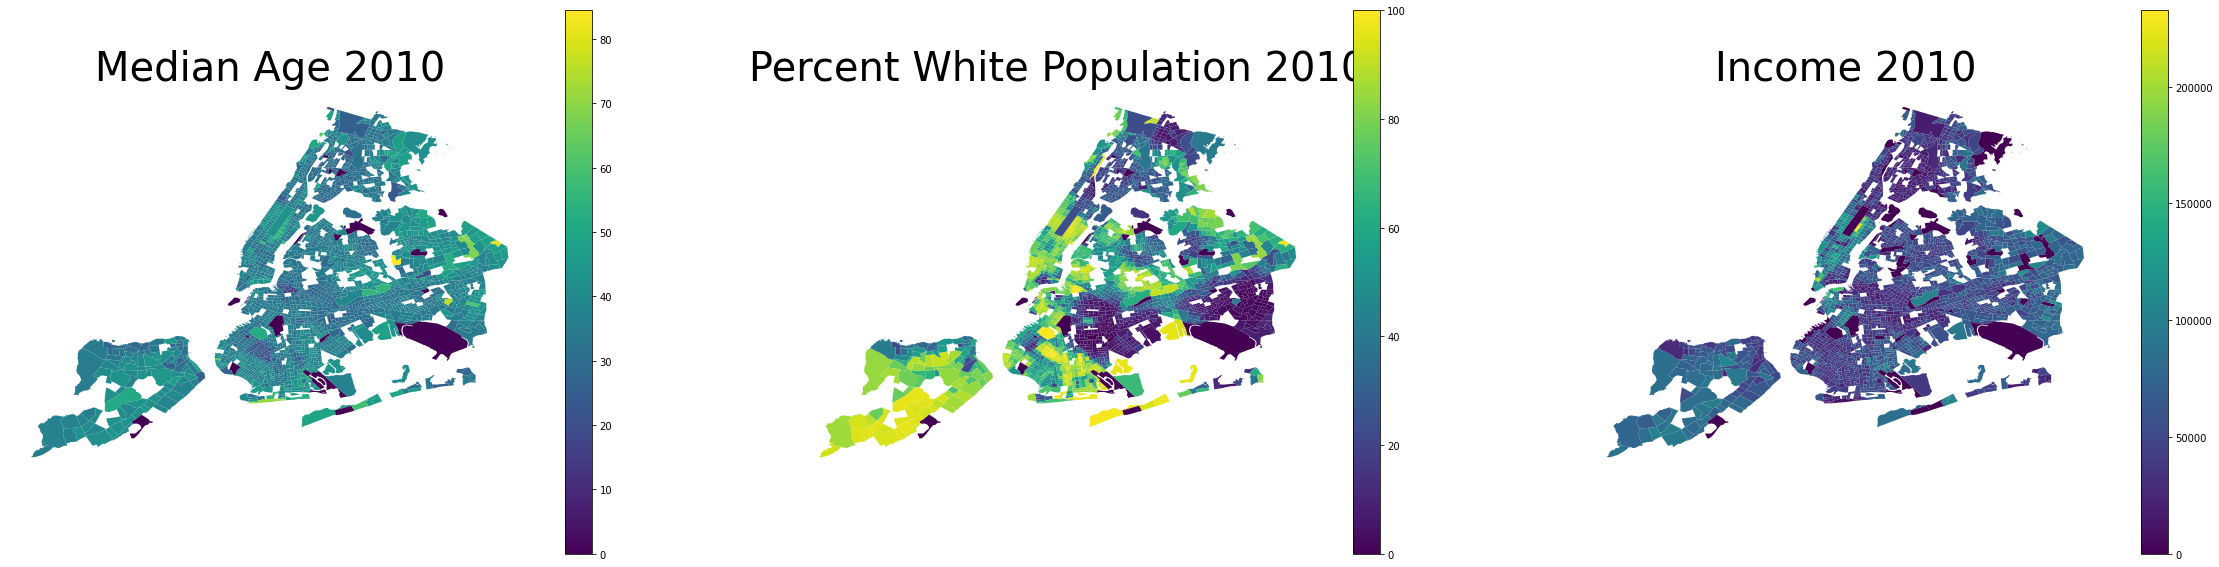

In [47]:
fig, axes = plt.subplots(1,3, figsize=(40,10))
axes[0].set_title('Median Age 2010', fontsize = 40)
axes[0].axis('Off')
censusdat.plot(ax=axes[0], column='MedianAge10', legend=True)

axes[1].set_title('Percent White Population 2010', fontsize = 40)
axes[1].axis('Off')
censusdat.plot(ax=axes[1], column='PercWhite10', legend=True)



axes[2].set_title('Income 2010', fontsize = 40)
axes[2].axis('Off')
censusdat.plot(ax=axes[2], column='income2010', cmap = 'viridis', legend=True)

Figure 6: Median age, percent of white population, and income mapped for 2010. Median age doesn't show that much variation or spatial autocorrelation throughout the map. Percent white population shows a lot of variation and spatial autocorrelation, with higher values appearing in Manhattan and Staten Island, and lower values on the east side of Brooklyn. Income also shows less variation, with higher income typically occuring in Manhattan.


*** I had difficulty merging the census tract data with the census shapefile because of the census code differences between the two datasets. I tried to combine state FIPS, City FIPS, and ID from the shapefile to match the GEOID in the census data. However, many tracts are missing data and I was unable to figure out why.

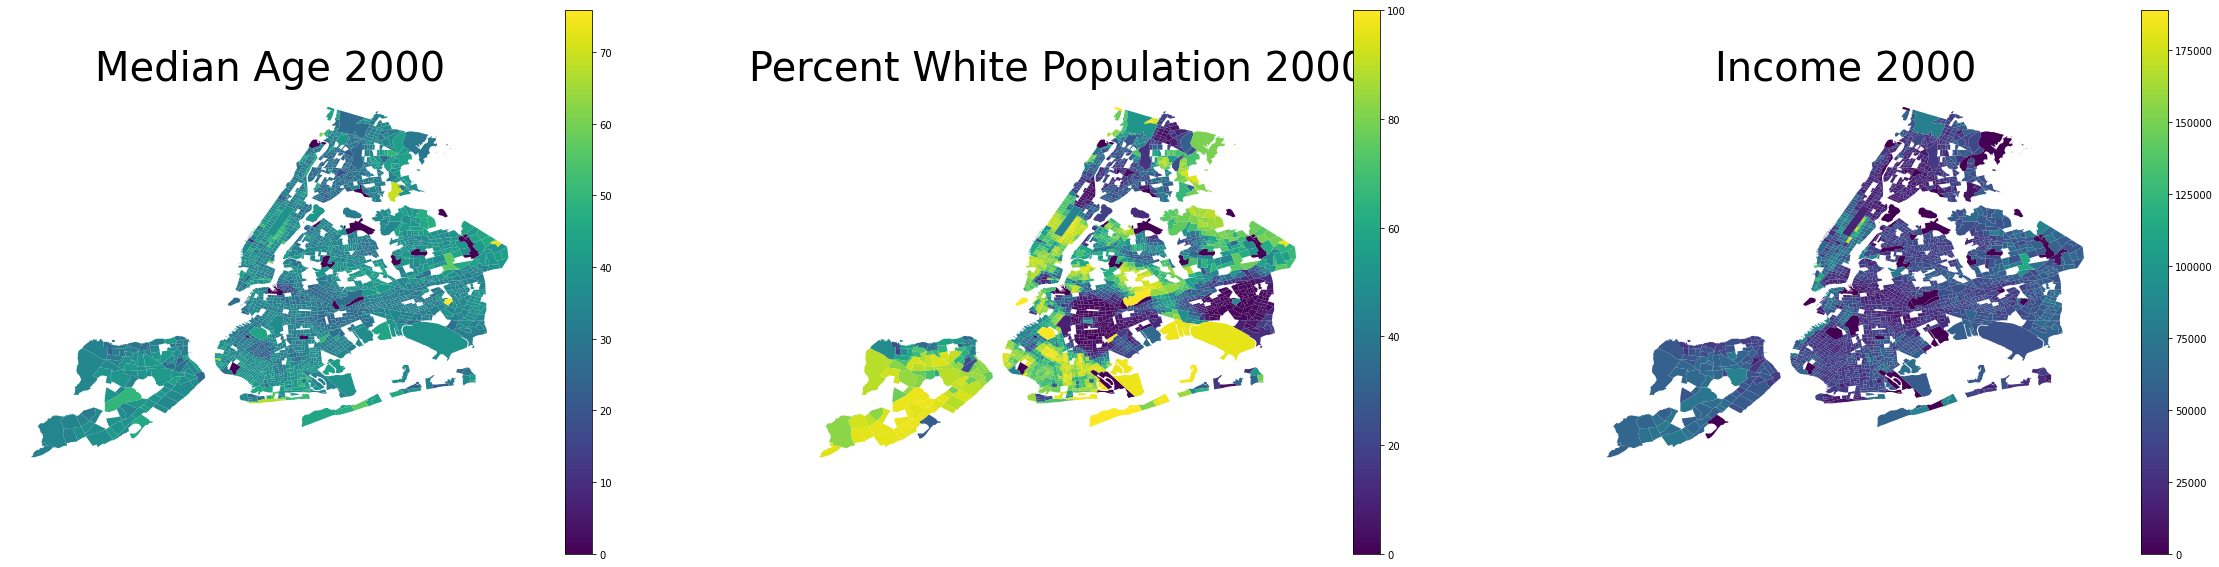

In [48]:
fig, axes = plt.subplots(1,3, figsize=(40,10))
axes[0].set_title('Median Age 2000', fontsize = 40)
axes[0].axis('Off')
censusdat.plot(ax=axes[0], column='MedianAge00', legend=True)

axes[1].set_title('Percent White Population 2000', fontsize = 40)
axes[1].axis('Off')
censusdat.plot(ax=axes[1], column='PercWhite00', legend = True)

axes[2].set_title('Income 2000', fontsize = 40)
axes[2].axis('Off')
censusdat.plot(ax=axes[2], column='inc00', cmap = 'viridis', legend = True)

Figure 7: Age, percent white population, and income for 2000. Median age shows little variation with some tracts having very low age. Percent white population shows trends such as being higher in Staten Island and Manhattan while being lower in the east of Brookyln and Queens. Income shows higher income in Staten Island and Manhattan as well as some areas in Queens.

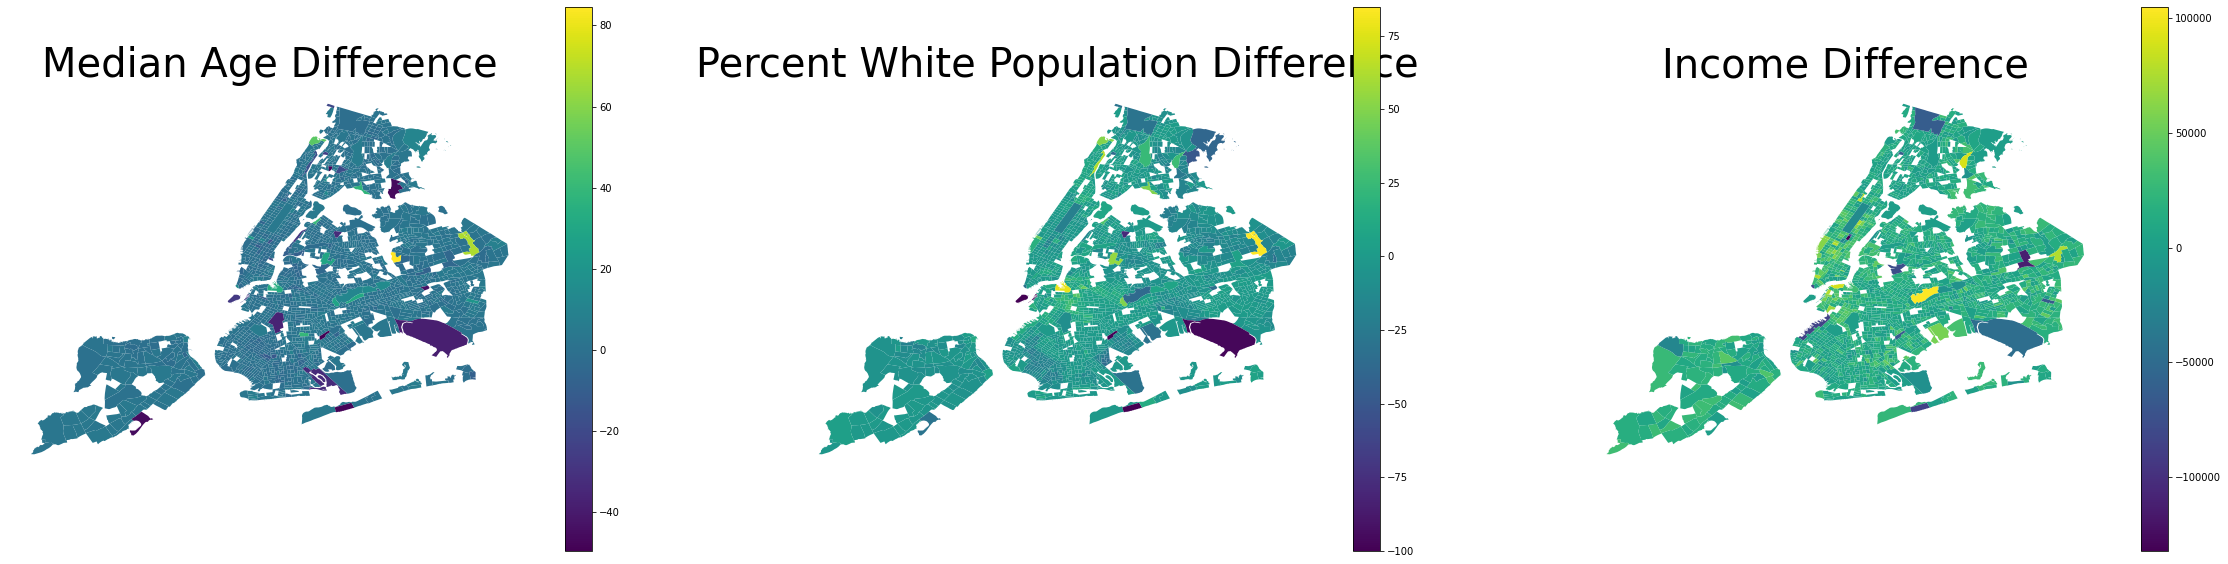

In [49]:
censusdat['incdif'] = censusdat['income2010'] - censusdat['income2000']
censusdat['wfracdif'] = censusdat['PercWhite10'] - censusdat['PercWhite00']
censusdat['agedif'] = censusdat['MedianAge10'] - censusdat['MedianAge00']

fig, axes = plt.subplots(1,3, figsize=(40,10))
axes[0].set_title('Median Age Difference', fontsize = 40)
axes[0].axis('Off')
censusdat.plot(ax=axes[0], column='agedif', legend=True)

axes[1].set_title('Percent White Population Difference', fontsize = 40)
axes[1].axis('Off')
censusdat.plot(ax=axes[1], column='wfracdif', legend = True)

axes[2].set_title('Income Difference', fontsize = 40)
axes[2].axis('Off')
censusdat.plot(ax=axes[2], column='incdif', cmap = 'viridis', legend = True)

Figure 8: Differences in age, white population, and income from 2000 to 2010. Age shows little change, with a few smaller tracts showing more young people in 2010. Percent white population shows some census tracts with a much higher white fraction in 2010 throughout the map. Income also shows some much higher income in 2010 throughout the map, but especially in Manhattan.

In [50]:

d2000 = censusdat.merge(bizip, left_on = 'ZIPCODE', right_on = 'ZIPCODE')
d2000 = d2000[['ZIPCODE', 'geometry_x', 'MedianAge00', 'PercWhite00', 'income2000', 'bdens00']]
d2000

,ZIPCODE,geometry_x,MedianAge00,PercWhite00,income2000,bdens00
0,10301,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ...",33.2,43.1,35703.0,35.451037
1,10301,"MULTIPOLYGON (((-74.07793 40.63810, -74.07855 ...",30.6,40.7,37321.0,35.451037
2,10301,"MULTIPOLYGON (((-74.07258 40.63794, -74.07330 ...",31.7,47.0,37813.0,35.451037
3,10301,"MULTIPOLYGON (((-74.09407 40.61770, -74.09407 ...",35.5,65.3,48271.0,35.451037
4,10301,"MULTIPOLYGON (((-74.09407 40.61770, -74.09383 ...",27.6,83.3,57500.0,35.451037
...,...,...,...,...,...,...
1949,11371,"MULTIPOLYGON (((-73.89009 40.77363, -73.89034 ...",0.0,0.0,0.0,15.538549
1950,11414,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ...",44.5,97.3,57108.0,43.074780
1951,11414,"MULTIPOLYGON (((-73.83033 40.65513, -73.83038 ...",39.5,96.8,60056.0,43.074780
1952,11430,"MULTIPOLYGON (((-73.74712 40.63716, -73.74707 ...",38.5,96.4,47750.0,9.722816


In [51]:

d2010 = censusdat.merge(bizip, left_on = 'ZIPCODE', right_on = 'ZIPCODE')
d2010 = d2010[['ZIPCODE', 'geometry_x', 'MedianAge10', 'PercWhite10', 'income2010', 'bdens10']]
d2010

,ZIPCODE,geometry_x,MedianAge10,PercWhite10,income2010,bdens10
0,10301,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ...",34.2,39.7,56192.0,38.689919
1,10301,"MULTIPOLYGON (((-74.07793 40.63810, -74.07855 ...",30.5,40.9,36624.0,38.689919
2,10301,"MULTIPOLYGON (((-74.07258 40.63794, -74.07330 ...",40.3,58.5,46731.0,38.689919
3,10301,"MULTIPOLYGON (((-74.09407 40.61770, -74.09407 ...",35.9,62.7,67639.0,38.689919
4,10301,"MULTIPOLYGON (((-74.09407 40.61770, -74.09383 ...",26.1,79.7,67191.0,38.689919
...,...,...,...,...,...,...
1949,11371,"MULTIPOLYGON (((-73.89009 40.77363, -73.89034 ...",0.0,0.0,0.0,19.170937
1950,11414,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ...",48.1,96.0,92034.0,42.397199
1951,11414,"MULTIPOLYGON (((-73.83033 40.65513, -73.83038 ...",43.5,93.7,70393.0,42.397199
1952,11430,"MULTIPOLYGON (((-73.74712 40.63716, -73.74707 ...",0.0,0.0,0.0,10.589819


In [52]:
d20 = d2000[['MedianAge00', 'PercWhite00', 'income2000', 'bdens00']].values
d2000_st = (d20 - d20.mean(axis=1, keepdims=True)) / d20.std(axis=1, keepdims=True)


In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

y = kmeans.fit_predict(d2000_st)
d2000['cluster'] = pd.Series(y, index=d2000.index)
d2000 = GeoDataFrame(d2000)

d2000.rename(columns={'geometry_x': 'geometry'}, 
            inplace=True)
d2000

,ZIPCODE,geometry,MedianAge00,PercWhite00,income2000,bdens00,cluster
0,10301,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ...",33.2,43.1,35703.0,35.451037,0
1,10301,"MULTIPOLYGON (((-74.07793 40.63810, -74.07855 ...",30.6,40.7,37321.0,35.451037,0
2,10301,"MULTIPOLYGON (((-74.07258 40.63794, -74.07330 ...",31.7,47.0,37813.0,35.451037,0
3,10301,"MULTIPOLYGON (((-74.09407 40.61770, -74.09407 ...",35.5,65.3,48271.0,35.451037,0
4,10301,"MULTIPOLYGON (((-74.09407 40.61770, -74.09383 ...",27.6,83.3,57500.0,35.451037,0
...,...,...,...,...,...,...,...
1949,11371,"MULTIPOLYGON (((-73.89009 40.77363, -73.89034 ...",0.0,0.0,0.0,15.538549,1
1950,11414,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ...",44.5,97.3,57108.0,43.074780,0
1951,11414,"MULTIPOLYGON (((-73.83033 40.65513, -73.83038 ...",39.5,96.8,60056.0,43.074780,0
1952,11430,"MULTIPOLYGON (((-73.74712 40.63716, -73.74707 ...",38.5,96.4,47750.0,9.722816,0


In [54]:
d21 = d2010[['MedianAge10', 'PercWhite10', 'income2010', 'bdens10']].values
d2010_st = (d21 - d21.mean(axis=1, keepdims=True)) / d21.std(axis=1, keepdims=True)


*** Trying to standardize the data. Before doing this the clusters showed much more variety.

In [55]:
kmeans = KMeans(n_clusters=5)

y = kmeans.fit_predict(d2010_st)
d2010['cluster'] = pd.Series(y, index=d2010.index)
d2010 = GeoDataFrame(d2010)

d2010.rename(columns={'geometry_x': 'geometry'}, 
            inplace=True)
d2010

,ZIPCODE,geometry,MedianAge10,PercWhite10,income2010,bdens10,cluster
0,10301,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ...",34.2,39.7,56192.0,38.689919,0
1,10301,"MULTIPOLYGON (((-74.07793 40.63810, -74.07855 ...",30.5,40.9,36624.0,38.689919,0
2,10301,"MULTIPOLYGON (((-74.07258 40.63794, -74.07330 ...",40.3,58.5,46731.0,38.689919,0
3,10301,"MULTIPOLYGON (((-74.09407 40.61770, -74.09407 ...",35.9,62.7,67639.0,38.689919,0
4,10301,"MULTIPOLYGON (((-74.09407 40.61770, -74.09383 ...",26.1,79.7,67191.0,38.689919,0
...,...,...,...,...,...,...,...
1949,11371,"MULTIPOLYGON (((-73.89009 40.77363, -73.89034 ...",0.0,0.0,0.0,19.170937,1
1950,11414,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ...",48.1,96.0,92034.0,42.397199,0
1951,11414,"MULTIPOLYGON (((-73.83033 40.65513, -73.83038 ...",43.5,93.7,70393.0,42.397199,0
1952,11430,"MULTIPOLYGON (((-73.74712 40.63716, -73.74707 ...",0.0,0.0,0.0,10.589819,1


In [56]:
dall = d2010.merge(d2000, left_on='ZIPCODE', right_on = 'ZIPCODE')
dall['change'] = dall['cluster_x'] - dall['cluster_y']

dall = GeoDataFrame(dall)

dall.rename(columns={'geometry_x': 'geometry'}, 
            inplace=True)
dall = GeoDataFrame(dall)
dall

,ZIPCODE,geometry,MedianAge10,PercWhite10,income2010,bdens10,cluster_x,geometry_y,MedianAge00,PercWhite00,income2000,bdens00,cluster_y,change
0,10301,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ...",34.2,39.7,56192.0,38.689919,0,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ...",33.2,43.1,35703.0,35.451037,0,0
1,10301,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ...",34.2,39.7,56192.0,38.689919,0,"MULTIPOLYGON (((-74.07793 40.63810, -74.07855 ...",30.6,40.7,37321.0,35.451037,0,0
2,10301,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ...",34.2,39.7,56192.0,38.689919,0,"MULTIPOLYGON (((-74.07258 40.63794, -74.07330 ...",31.7,47.0,37813.0,35.451037,0,0
3,10301,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ...",34.2,39.7,56192.0,38.689919,0,"MULTIPOLYGON (((-74.09407 40.61770, -74.09407 ...",35.5,65.3,48271.0,35.451037,0,0
4,10301,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ...",34.2,39.7,56192.0,38.689919,0,"MULTIPOLYGON (((-74.09407 40.61770, -74.09383 ...",27.6,83.3,57500.0,35.451037,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30417,11414,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ...",48.1,96.0,92034.0,42.397199,0,"MULTIPOLYGON (((-73.83033 40.65513, -73.83038 ...",39.5,96.8,60056.0,43.074780,0,0
30418,11414,"MULTIPOLYGON (((-73.83033 40.65513, -73.83038 ...",43.5,93.7,70393.0,42.397199,0,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ...",44.5,97.3,57108.0,43.074780,0,0
30419,11414,"MULTIPOLYGON (((-73.83033 40.65513, -73.83038 ...",43.5,93.7,70393.0,42.397199,0,"MULTIPOLYGON (((-73.83033 40.65513, -73.83038 ...",39.5,96.8,60056.0,43.074780,0,0
30420,11430,"MULTIPOLYGON (((-73.74712 40.63716, -73.74707 ...",0.0,0.0,0.0,10.589819,1,"MULTIPOLYGON (((-73.74712 40.63716, -73.74707 ...",38.5,96.4,47750.0,9.722816,0,1


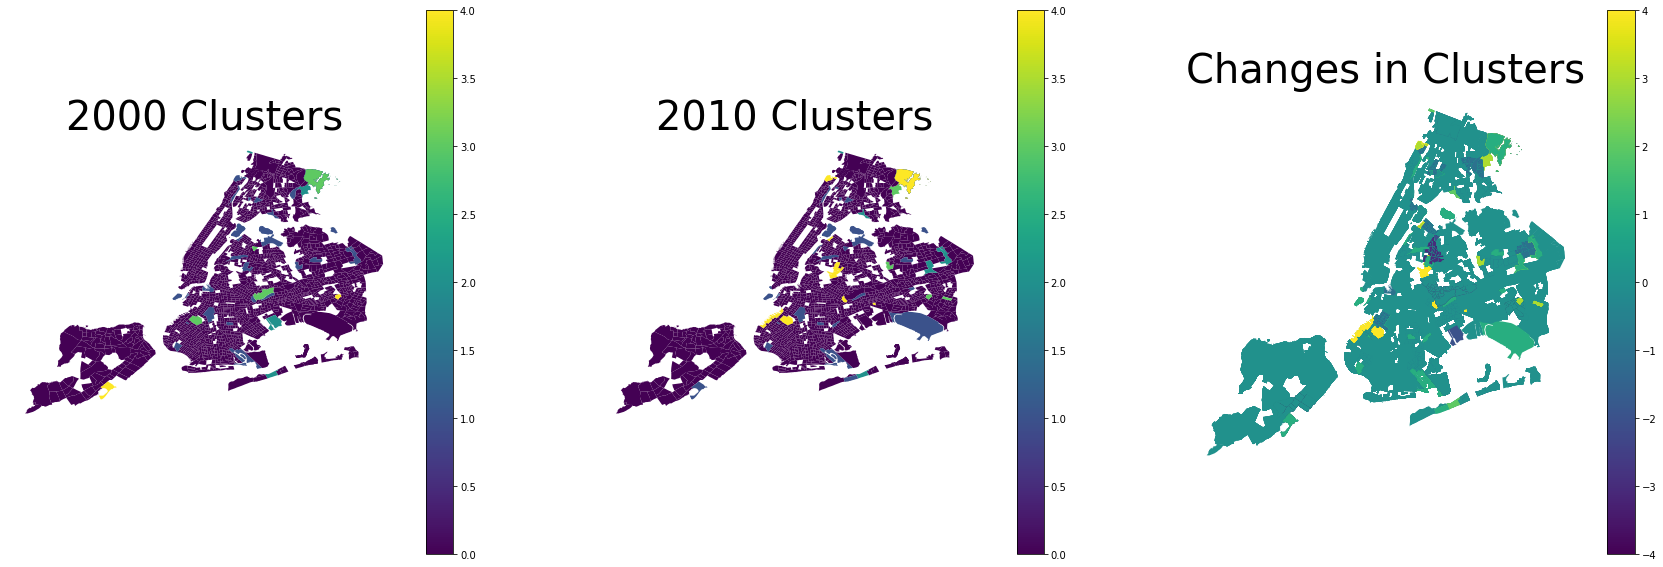

In [57]:


fig, axes = plt.subplots(1,3, figsize=(30,10))
axes[0].set_title('2000 Clusters', fontsize = 40)
axes[0].axis('Off')
d2000.plot(ax=axes[0], column='cluster', legend=True)

axes[1].set_title('2010 Clusters', fontsize = 40)
axes[1].axis('Off')
d2010.plot(ax=axes[1], column='cluster', legend=True)

axes[2].set_title('Changes in Clusters', fontsize = 40)
axes[2].axis('Off')
dall.plot(ax=axes[2], column='change', legend=True)

Figure 10: Clusters for 2000, 2010, and changes between the two based on income, age, business density, and percentage of white population. Five clusters were chosen because this showed the most clusters as appearing in different clusters rather than just having one tract per cluster. There are many similarities between the two cluster maps, especially with the clusters that fall into group 0. However, as the change map shows, many clusters do change between 2000 and 2010.

Figure 9: 

In [58]:
gcensus['ZIPCODE'] = gcensus.index
dall = dall[['ZIPCODE', 'income2000', 'income2010', 'MedianAge00', 'MedianAge10', 'PercWhite00', 'PercWhite10', 'bdens00', 'bdens10', 'cluster_x', 'cluster_y']]
l=[]
lst = []
cols = ['ZIPCODE', 'income2000', 'income2010', 'MedianAge00', 'MedianAge10', 'PercWhite00', 'PercWhite10', 'bdens00', 'bdens10', 'cluster_x', 'cluster_y']
i=0
g = pd.DataFrame(columns=['ZIPCODE', 'income2000', 'income2010', 'MedianAge00', 'MedianAge10', 'PercWhite00', 'PercWhite10', 'bdens00', 'bdens10', 'cluster_x', 'cluster_y'])
for index, row in dall.iterrows():
  if row['cluster_x'] != row['cluster_y']:
    code = (row['ZIPCODE'])
    #print(code)
    l.append(code)
    lst.append(row)
    g = pd.DataFrame(lst, columns=cols)

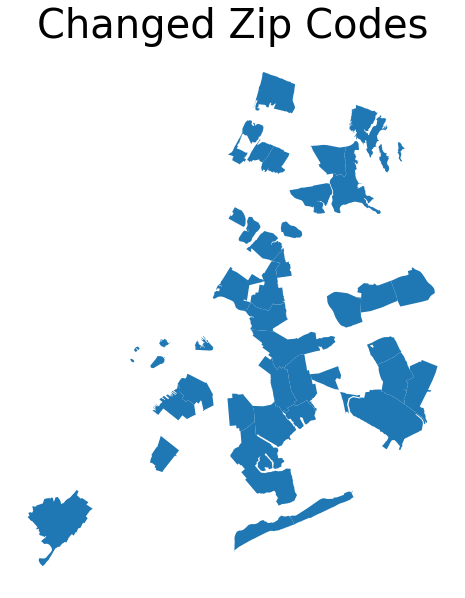

In [59]:
change = zcode[zcode.ZIPCODE.isin(l)]
fig, axes = plt.subplots(1,1, figsize=(30,10))
axes.set_title('Changed Zip Codes', fontsize = 40)
axes.axis('Off')
change.plot(ax=axes, legend=True)

Figure 11: Zip codes that contain census tracts that showed changes in clusters. These are spread throughout the map and comprise most Zipcodes.

In [60]:
g = g[['income2000', 'income2010', 'MedianAge00', 'MedianAge10', 'PercWhite00', 'PercWhite10', 'bdens00', 'bdens10']]
c = g.corr()
c

,income2000,income2010,MedianAge00,MedianAge10,PercWhite00,PercWhite10,bdens00,bdens10
income2000,1.000000,-0.687273,0.363042,-0.245869,0.372107,-0.291645,0.249698,0.243049
income2010,-0.687273,1.000000,-0.232387,0.294276,-0.204304,0.433485,-0.006678,-0.007301
MedianAge00,0.363042,-0.232387,1.000000,-0.079775,0.497211,-0.029813,0.043006,0.043877
MedianAge10,-0.245869,0.294276,-0.079775,1.000000,-0.156549,0.525415,-0.059063,-0.058369
PercWhite00,0.372107,-0.204304,0.497211,-0.156549,1.000000,0.104272,0.188185,0.181723
PercWhite10,-0.291645,0.433485,-0.029813,0.525415,0.104272,1.000000,0.036469,0.036915
bdens00,0.249698,-0.006678,0.043006,-0.059063,0.188185,0.036469,1.000000,0.900731
bdens10,0.243049,-0.007301,0.043877,-0.058369,0.181723,0.036915,0.900731,1.000000


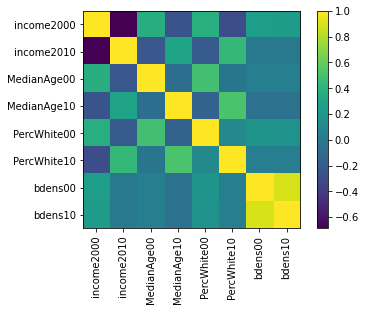

In [61]:
plt.imshow(g.corr())
plt.xticks(range(len(g.corr())), g.corr().columns, rotation='vertical')
plt.yticks(range(len(g.corr())), g.corr().columns)
plt.colorbar();

Figure 12: The Pearson's correlation can be used to determine the relationship between a variable in 2000 and 2010 to determine how it has changed. A high positive value would indicate not much change, while a low negative value would indicate the variable has seen an inverse trend.

The coefficient between income in 2000 and 2010 is -.687, indicating that the income within these census tracts has changed significantly. Between age, a coefficient of -.079 is seen, indicating a weak relationship between the two variables over time. Percentage white is .104, indicating a small positive relationship between these two variables. Finally, business density has a coefficient of .901 indicating little change over time.

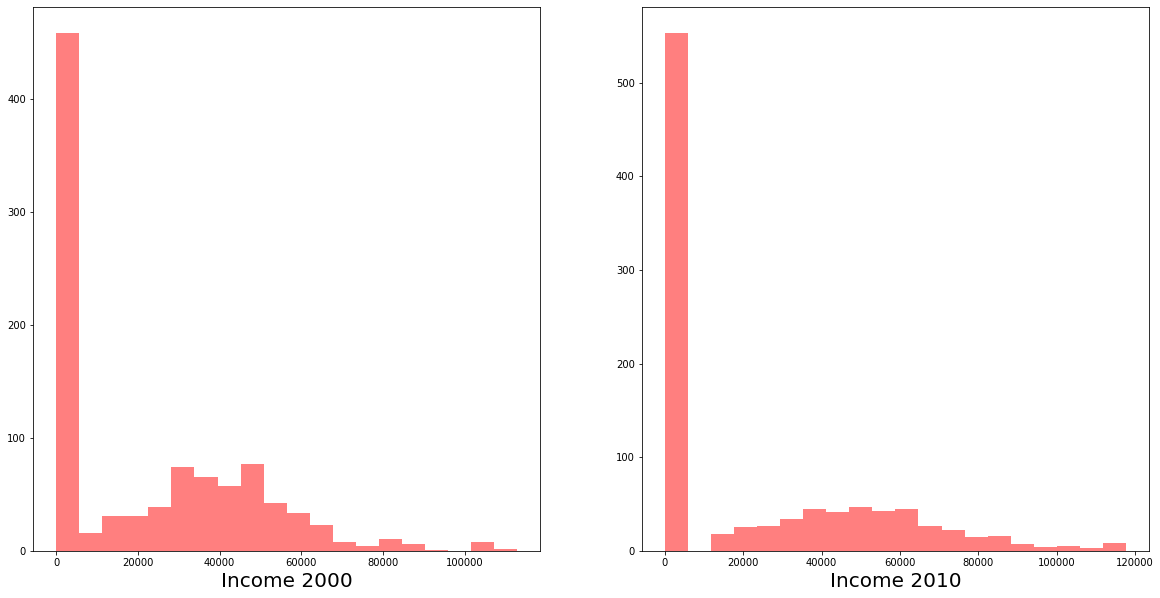

In [80]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].hist(g['income2000'], bins=20, alpha = 0.5, color = 'r')
ax[0].set_xlabel('Income 2000', fontsize=20)

ax[1].hist(g['income2010'], bins=20, alpha = 0.5, color = 'r')
ax[1].set_xlabel('Income 2010', fontsize=20)
plt.show()

Figure 13: Histograms of income between 2000 and 2010 in Zipcodes that changed clusters. Income is shown to grow which could be attributed to either inflation or gentrification.

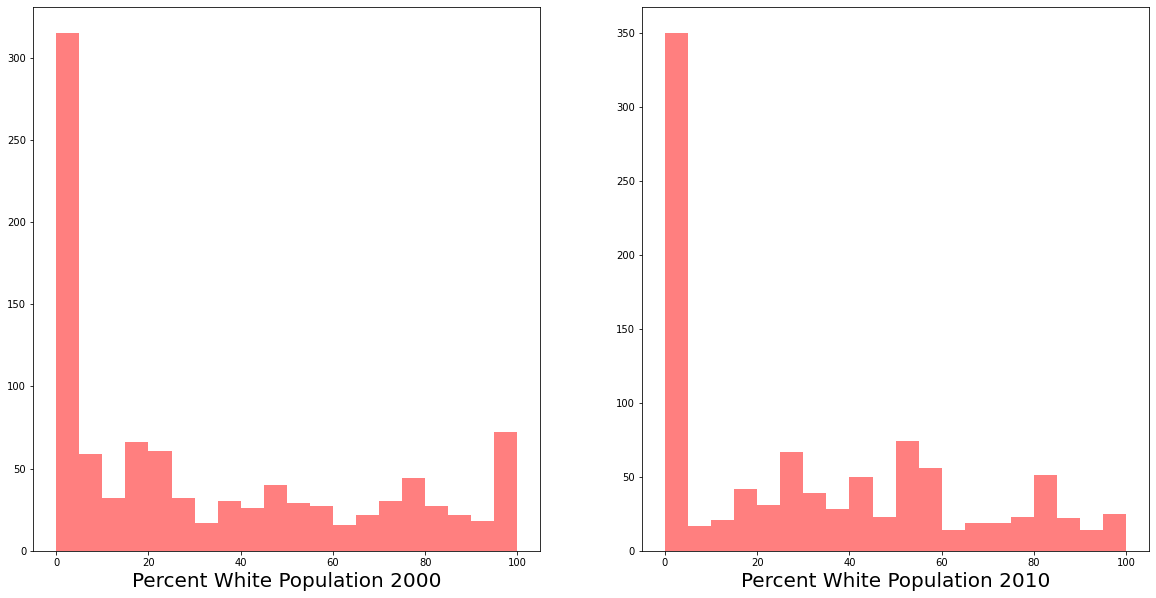

In [79]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].hist(g['PercWhite00'], bins=20, alpha = 0.5, color = 'r')
ax[0].set_xlabel('Percent White Population 2000', fontsize=20)

ax[1].hist(g['PercWhite10'], bins=20, alpha = 0.5, color = 'r')
ax[1].set_xlabel('Percent White Population 2010', fontsize=20)
plt.show()

Figure 14: Histograms for percent white population in changed Zipcodes. Less change is seen here, although there is change between the two years. Any trends are less clear, maybe due to growth and increase of white population depending on the census tract.

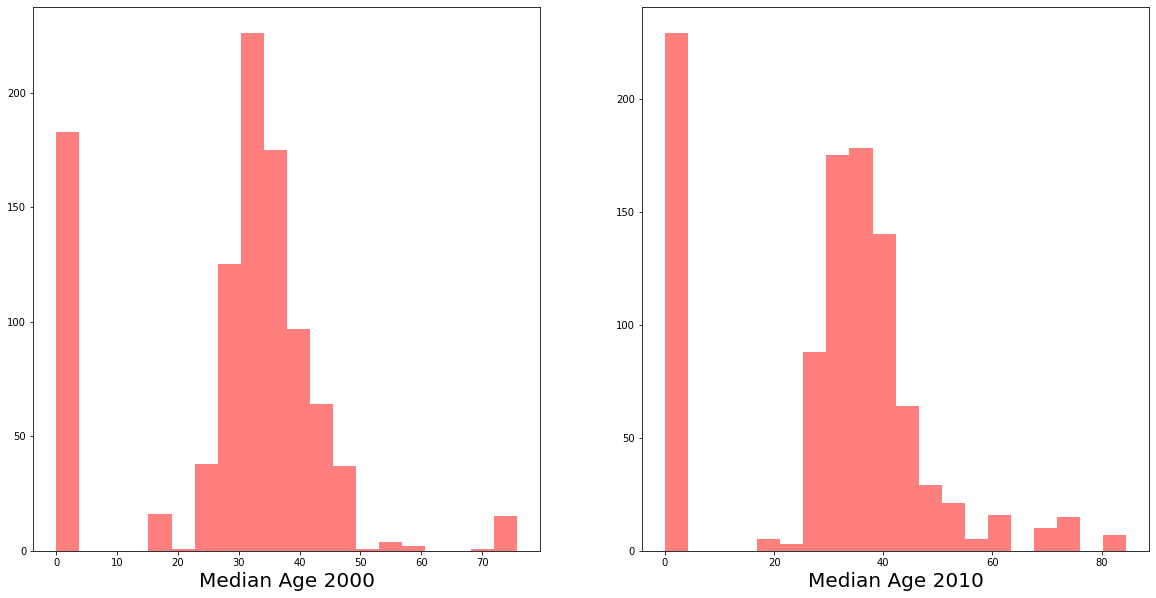

In [78]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].hist(g['MedianAge00'], bins=20, alpha = 0.5, color = 'r')
ax[0].set_xlabel('Median Age 2000', fontsize=20)

ax[1].hist(g['MedianAge10'], bins=20, alpha = 0.5, color = 'r')
ax[1].set_xlabel('Median Age 2010', fontsize=20)
plt.show()

Figure 15: Age beteween 2000 and 2010 in changed Zipcodes. Average age over 30 appears to be increasing, meaning more people over 30 are living in these areas.

*** Many areas return zeroes. I'm not sure why this is happening but it could be because those areas are just commercial districts.

This analysis used clustering of variables commonly associated with gentrification to understand how gentrification has impacted New York City. This is based on a clustering model and determining which clusters are becoming more or less gentrified over time. This model is very dependent on different aspects of the analysis, such as the geography level being used and the amount of clusters being created. Clustering also has the drawback associated with unsupervised models that we cannot control how classes are being created. This makes it more difficult to use this model for understanding gentrification. Additionally, interpreting why certain places were places in different clusters is difficult, especially when four input variables are used. The Pearson's correlation was a useful way in determining how these clusters did change over time based on the different variables associated with gentrification. One drawback of using the correlation is that if many tracts are becoming less gentrified and several are becoming more gentrified it is difficult to draw a conclusion. However, this model and use of correlation was very effective in showing patterns within the data and understanding the spread of these different variables throughout New York City. The correlation of changing Zipcodes showed good evidence that many of the cluster changes were due to increase in income in those census tracts.